<a href="https://colab.research.google.com/github/KiRIto1214/ML_Projects/blob/main/B20EE039_Flight_Ticket_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


DataSet - https://docs.google.com/spreadsheets/d/1duJy_VZoxnF_1jydxndbFDo1ubc-sX6W/edit#gid=1005231314


In [ ]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import seaborn as sns
from sklearn import metrics
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score , classification_report

data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Airline_data_project.csv.csv")

data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


EDA

In [ ]:
data = data.dropna()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 1001.4+ KB


In [ ]:
data.shape

(10682, 13)

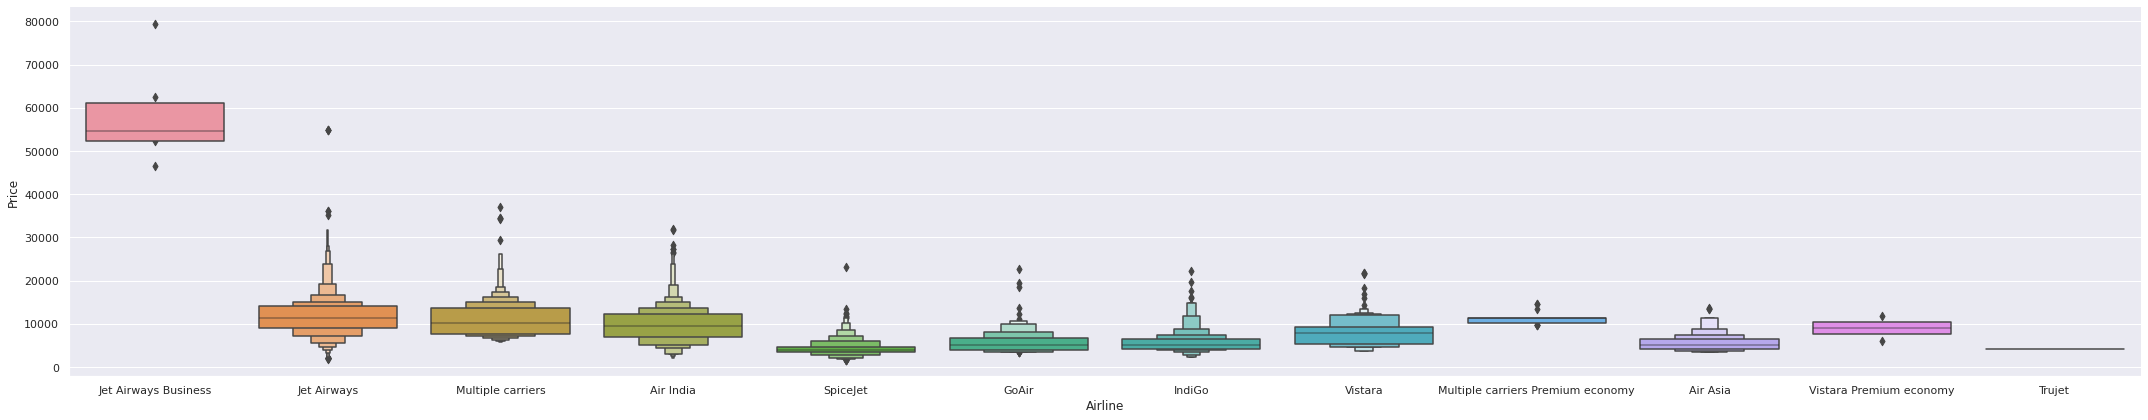

In [ ]:
import seaborn as sns
sns.set()
sns.catplot(y = "Price", x = "Airline", data = data.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 5)
plt.show()

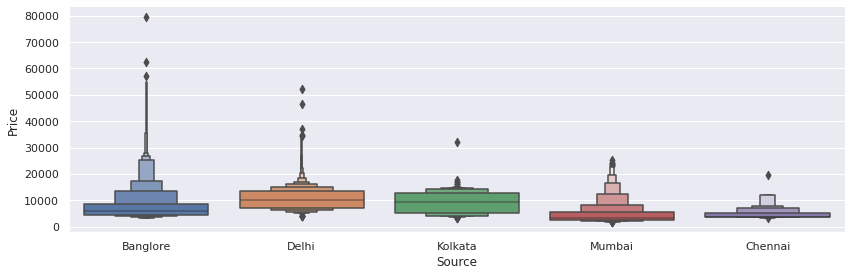

In [ ]:
sns.catplot(y = "Price", x = "Source", data = data.sort_values("Price", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()

In [ ]:
data["Journey_day"] = pd.to_datetime(data['Date_of_Journey'], format="%d/%m/%Y").dt.day
data["Journey_month"] = pd.to_datetime(data["Date_of_Journey"], format = "%d/%m/%Y").dt.month
data["Dep_hour"] = pd.to_datetime(data["Dep_Time"]).dt.hour
data["Dep_min"] = pd.to_datetime(data["Dep_Time"]).dt.minute

In [ ]:
data = data.drop(['Date_of_Journey','Dep_Time'],axis=1)

data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [ ]:
data["Arrival_hour"] = pd.to_datetime(data['Arrival_Time']).dt.hour


data["Arrival_min"] = pd.to_datetime(data['Arrival_Time']).dt.minute

data = data.drop(['Arrival_Time'],axis=1)

In [ ]:
data = data.drop(['Route','Additional_Info'],axis=1)
data = data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4})
data.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,2h 50m,0,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,7h 25m,2,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,19h,2,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,5h 25m,1,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,4h 45m,1,13302,1,3,16,50,21,35


In [ ]:
duration = list(data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:   
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   
        else:
            duration[i] = "0h " + duration[i]           

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))

data["Duration_hours"] = duration_hours
data["Duration_mins"] = duration_mins

data.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,2h 50m,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,7h 25m,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,19h,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,5h 25m,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,4h 45m,1,13302,1,3,16,50,21,35,4,45


In [ ]:
data = data.drop(['Duration'],axis=1)

In [ ]:
#Data are not in any order So, we use one hot encoder

one_hot_encoded_data = pd.get_dummies(data, columns = ['Airline', 'Source','Destination'])


In [ ]:
one_hot_encoded_data.head()

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,...,0,0,1,0,1,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,...,0,1,0,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,...,0,0,1,0,1,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,...,0,0,0,0,0,0,0,0,0,1


Now As The Data Got preprocessed, we can now start training our model

In [ ]:
tr = one_hot_encoded_data.drop(['Price'],axis=1)

X_train,X_test,y_train,y_test = train_test_split(tr,one_hot_encoded_data['Price'],test_size=0.3,shuffle=True,random_state=12)

In [ ]:
X_train.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air Asia,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
1281,1,15,6,19,0,1,30,6,30,0,...,0,1,0,0,0,1,0,0,0,0
920,0,21,6,7,5,9,20,2,15,0,...,1,0,0,0,0,0,0,0,1,0
10298,2,18,5,5,30,19,0,13,30,0,...,0,1,0,0,0,1,0,0,0,0
7976,2,21,3,10,20,18,50,32,30,0,...,0,1,0,0,0,1,0,0,0,0
3144,0,6,3,5,10,8,0,2,50,0,...,0,1,0,0,0,1,0,0,0,0


In [ ]:
y_train.head()

1281      6795
920       3687
10298    13029
7976      9254
3144      6881
Name: Price, dtype: int64

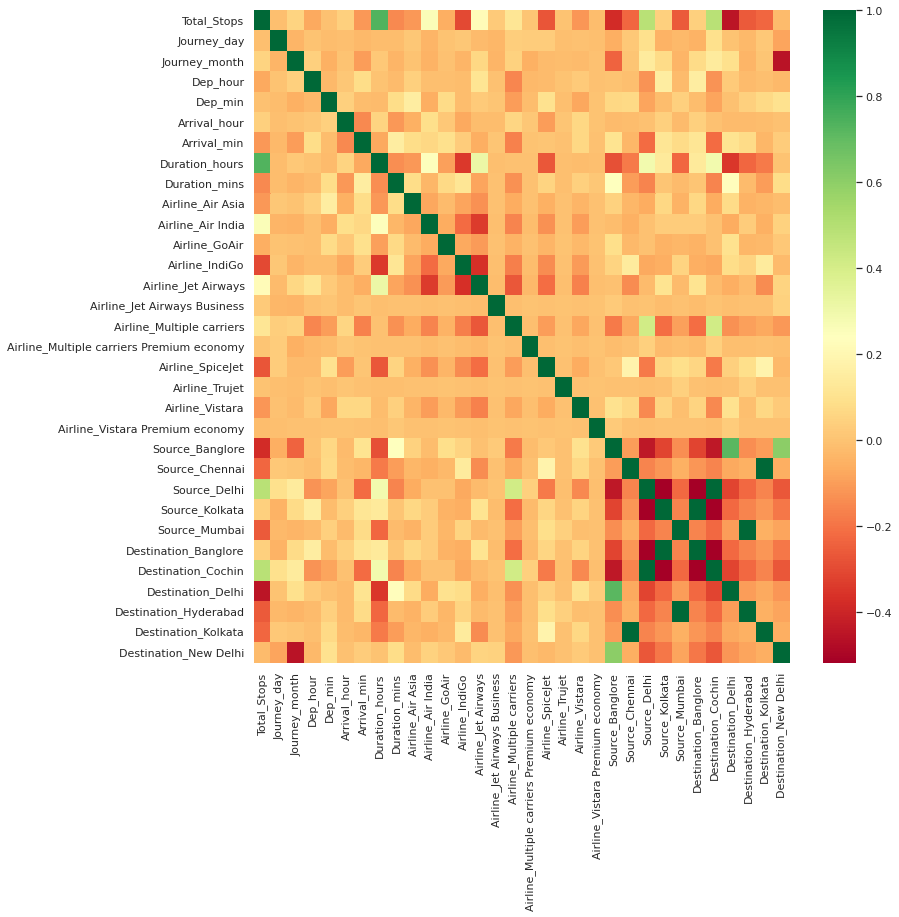

In [ ]:
plt.figure(figsize = (12,12))
sns.heatmap(X_train.corr(),cmap = "RdYlGn")

plt.show()

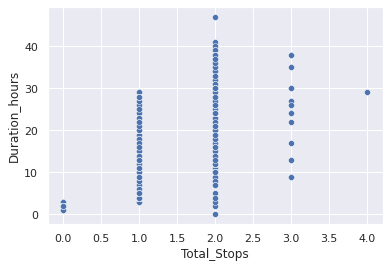

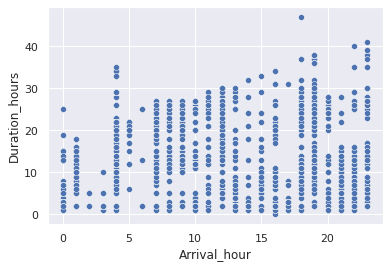

In [ ]:
plt.figure(0)
sns.scatterplot(x = "Total_Stops", y = "Duration_hours", data = X_train)
plt.figure(1)
sns.scatterplot(x = "Arrival_hour", y = "Duration_hours", data = X_train)



Model Training

In [ ]:
import xgboost
from xgboost import XGBRegressor

model1 = XGBRegressor()

model1.fit(X_train,y_train)

prediction1 = model1.predict(X_test)



[10:02:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
print('XGB MAE:', metrics.mean_absolute_error(y_test, prediction1))
print('XGB MSE:', metrics.mean_squared_error(y_test, prediction1))
print('XGB RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction1)))

XGB MAE: 1557.4107876639284
XGB MSE: 5317276.192126101
XGB RMSE: 2305.9219830961542


In [ ]:
metrics.r2_score(y_test, prediction1)

0.7450890433027875

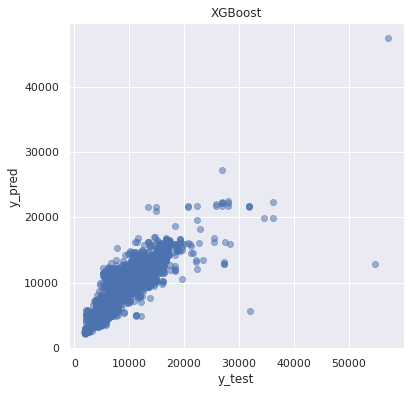

In [ ]:
plt.figure(figsize = (6,6))
plt.scatter(y_test, prediction1, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.title('XGBoost')
plt.show()

In [ ]:
from lightgbm import LGBMRegressor

model_lgm = LGBMRegressor()

model_lgm.fit(X_train,y_train)

prediction_lgm = model_lgm.predict(X_test)



In [ ]:
print('LGM MAE:', metrics.mean_absolute_error(y_test, prediction_lgm))
print('LGM MSE:', metrics.mean_squared_error(y_test, prediction_lgm))
print('LGM RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction_lgm)))

LGM MAE: 1277.007150236197
LGM MSE: 4306626.91679185
LGM RMSE: 2075.241411689698


In [ ]:
metrics.r2_score(y_test, prediction_lgm)

0.7935397094619563

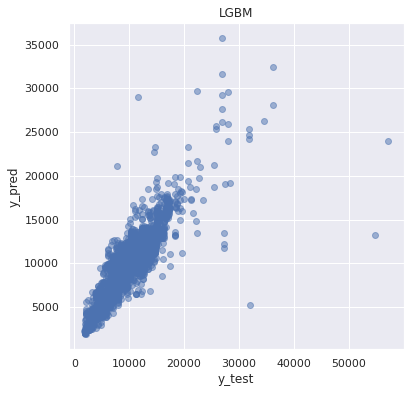

In [ ]:
plt.figure(figsize = (6,6))
plt.scatter(y_test, prediction_lgm, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.title('LGBM')
plt.show()

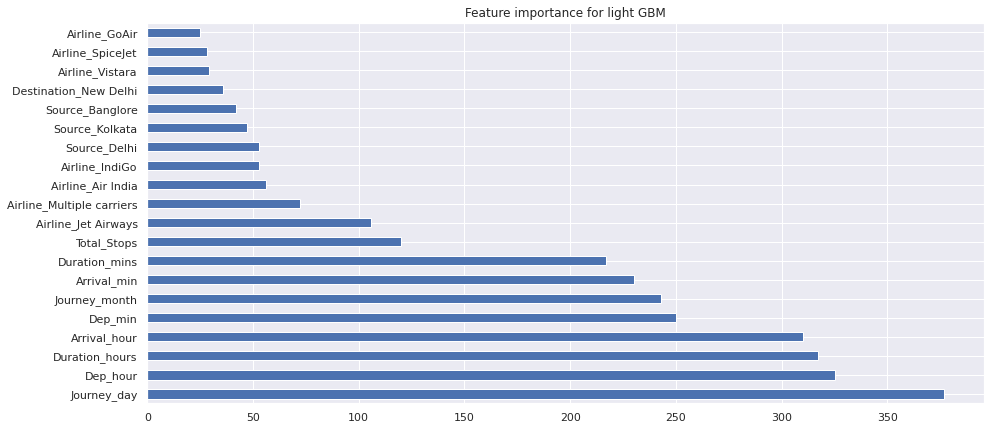

In [ ]:
plt.figure(figsize = (15,7))
feat_importances = pd.Series(model_lgm.feature_importances_, index=X_train.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.title("Feature importance for light GBM")
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor


model_forest=RandomForestRegressor()
                            
model_forest.fit(X_train,y_train)

prediction_forest = model_forest.predict(X_test)

In [ ]:
print('Random Forest MAE :', metrics.mean_absolute_error(y_test,prediction_forest))
print('Random  Forest :', metrics.mean_squared_error(y_test, prediction_forest))
print('Random Forest RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction_forest)))

Random Forest MAE : 1197.8645021477048
Random  Forest : 4985178.276068049
Random Forest RMSE: 2232.751279490855


In [ ]:
metrics.r2_score(y_test, prediction_forest)

0.7610098633694351

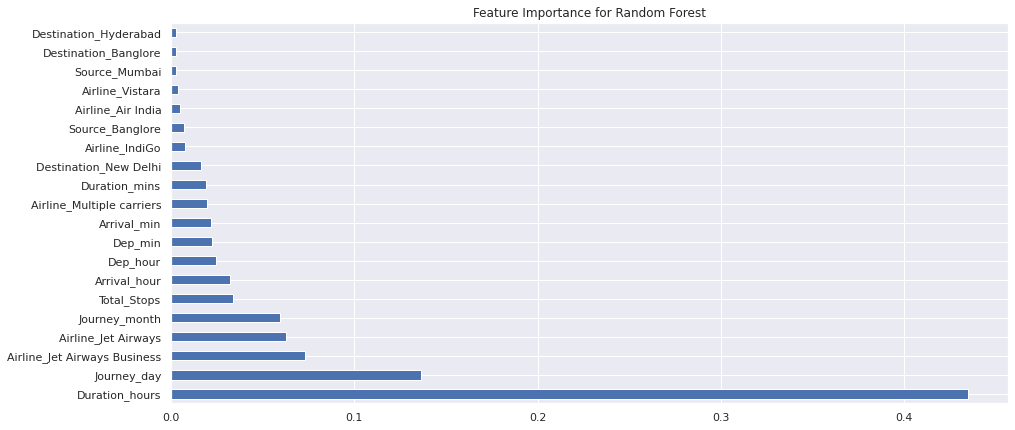

In [ ]:
plt.figure(figsize = (15,7))
feat_importances = pd.Series(model_forest.feature_importances_, index=X_train.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.title('Feature Importance for Random Forest')
plt.show()

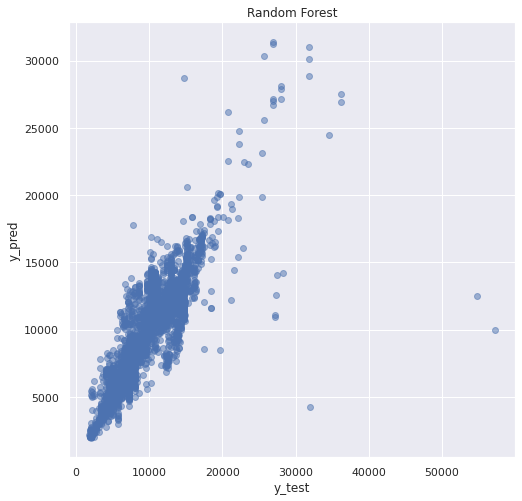

In [ ]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction_forest, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.title("Random Forest")
plt.show()

In [ ]:
from sklearn.svm import SVR

model_SVM = SVR(kernel='linear')

model_SVM.fit(X_train, y_train)

prediction_SVM = model_SVM.predict(X_test)

In [ ]:
print('SVM MAE:', metrics.mean_absolute_error(y_test,prediction_SVM))
print('SVM MSE:', metrics.mean_squared_error(y_test, prediction_SVM))
print('SVM RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction_SVM)))

SVM MAE: 2254.874414628522
SVM MSE: 12341323.675767068
SVM RMSE: 3513.0220147000314


In [ ]:
metrics.r2_score(y_test, prediction_SVM)

0.40835523462965984

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

model_knn = KNeighborsRegressor(n_neighbors=3)

model_knn.fit(X_train, y_train)

prediction_knn = model_knn.predict(X_test)

In [ ]:
print('KNN MAE:', metrics.mean_absolute_error(y_test,prediction_knn))
print('KNN MSE:', metrics.mean_squared_error(y_test, prediction_knn))
print('KNN RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction_knn)))

KNN MAE: 1826.8083203328133
KNN MSE: 8869503.009880394
KNN RMSE: 2978.1710847230374


In [ ]:
metrics.r2_score(y_test, prediction_knn)

0.5747947979408254

In [ ]:
#Neural Network
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
 
model = Sequential() 
model.add(Dense(128, activation='relu', input_dim=10))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid')) 
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['']) 
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1408      
                                                                 
 dense_1 (Dense)             (None, 16)                2064      
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 3,489
Trainable params: 3,489
Non-trainable params: 0
_________________________________________________________________


In [ ]:

from keras.callbacks import ModelCheckpoint
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

NN_model = Sequential()


NN_model.add(Dense(128, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))

NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))


NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               4224      
                                                                 
 dense_4 (Dense)             (None, 256)               33024     
                                                                 
 dense_5 (Dense)             (None, 256)               65792     
                                                                 
 dense_6 (Dense)             (None, 256)               65792     
                                                                 
 dense_7 (Dense)             (None, 1)                 257       
                                                                 
Total params: 169,089
Trainable params: 169,089
Non-trainable params: 0
_________________________________________________________________


In [ ]:
checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

In [ ]:
NN_model.fit(X_train, y_train, epochs=300, batch_size=32, validation_split = 0.2, callbacks=callbacks_list)

Epoch 1/300
185/187 [============================>.] - ETA: 0s - loss: 4102.9917 - mean_absolute_error: 4102.9917
Epoch 1: val_loss improved from inf to 2535.17041, saving model to Weights-001--2535.17041.hdf5
187/187 [==============================] - 2s 5ms/step - loss: 4085.4834 - mean_absolute_error: 4085.4834 - val_loss: 2535.1704 - val_mean_absolute_error: 2535.1704
Epoch 2/300
186/187 [============================>.] - ETA: 0s - loss: 2543.1382 - mean_absolute_error: 2543.1382
Epoch 2: val_loss improved from 2535.17041 to 2202.25562, saving model to Weights-002--2202.25562.hdf5
187/187 [==============================] - 1s 5ms/step - loss: 2540.3074 - mean_absolute_error: 2540.3074 - val_loss: 2202.2556 - val_mean_absolute_error: 2202.2556
Epoch 3/300
186/187 [============================>.] - ETA: 0s - loss: 2216.9185 - mean_absolute_error: 2216.9185
Epoch 3: val_loss improved from 2202.25562 to 2021.17114, saving model to Weights-003--2021.17114.hdf5
187/187 [=================

In [ ]:
NN_y_pred = NN_model.predict(X_test)

In [ ]:
print('NN MAE:', metrics.mean_absolute_error(y_test,NN_y_pred))
print('NN MSE:', metrics.mean_squared_error(y_test, NN_y_pred))
print('NN RMSE:', np.sqrt(metrics.mean_squared_error(y_test, NN_y_pred)))

NN MAE: 1405.2168088725502
NN MSE: 5427639.567091522
NN RMSE: 2329.729505133916


In [ ]:
metrics.r2_score(y_test, NN_y_pred )

0.7397982078298384

In [ ]:
from sklearn.model_selection import cross_val_score

def cross_val(model,X,y) :
  

  scores = cross_val_score(model, X, y,scoring='r2',cv=5)
  plt.figure(figsize=(8,4))
  plt.plot(range(1,6), scores)
  plt.title(model)
  plt.xlabel('nth interation')
  plt.ylabel('score')
  plt.ylim(0.35, 0.95)
  plt.grid()
  plt.show()
  print(model,'\nCross Validation Score\n',scores)
  print("\nAverage CV Score = ", scores.mean())
  return



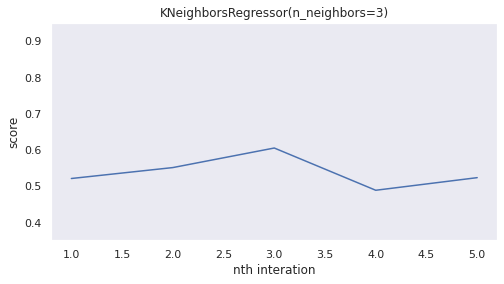

KNeighborsRegressor(n_neighbors=3) 
Cross Validation Score
 [0.52052514 0.55067581 0.60464477 0.48807723 0.52285981]

Average CV Score =  0.53735655117032


In [ ]:
cross_val(KNeighborsRegressor(n_neighbors=3),X_train,y_train)

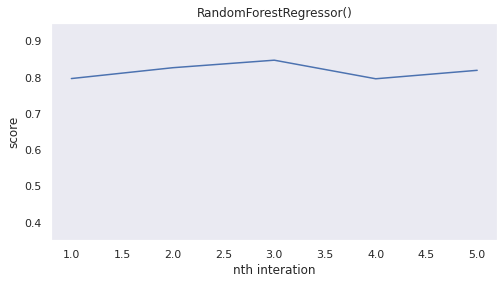

RandomForestRegressor() 
Cross Validation Score
 [0.7963149  0.82623377 0.8470026  0.79571739 0.81904589]

Average CV Score =  0.816862910788867


In [ ]:
cross_val(RandomForestRegressor(),X_train,y_train)

[15:19:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:19:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:19:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:19:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:19:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


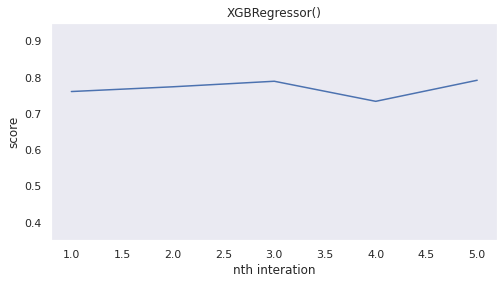

XGBRegressor() 
Cross Validation Score
 [0.76050237 0.77359503 0.78888317 0.73348998 0.79162881]

Average CV Score =  0.7696198714754108


In [ ]:
cross_val(XGBRegressor(),X_train,y_train) 

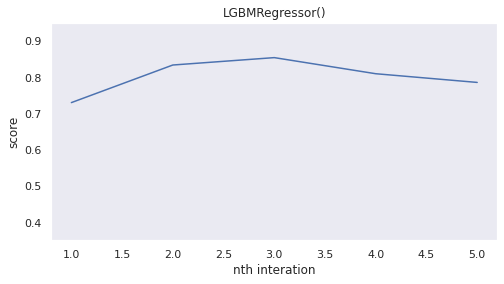

LGBMRegressor() 
Cross Validation Score
 [0.72994075 0.83368161 0.85407164 0.80964431 0.78564787]

Average CV Score =  0.8025972364292532


In [ ]:
cross_val(LGBMRegressor(),X_train,y_train) 

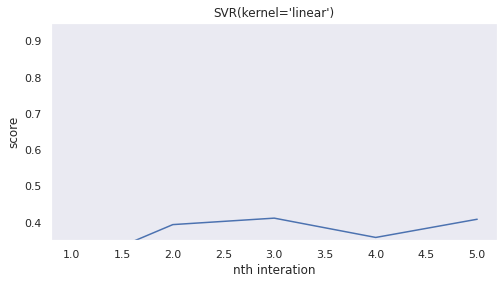

SVR(kernel='linear') 
Cross Validation Score
 [0.2750588  0.39331811 0.41114055 0.35787974 0.40811065]

Average CV Score =  0.3691015673818686


In [ ]:
cross_val(SVR(kernel='linear'),X_train,y_train) 

Now Train the model for best Models using Grid aur RandomizedSearchCV

In [ ]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

Random_search = RandomizedSearchCV(estimator = RandomForestRegressor(), param_distributions = random_grid,scoring='r2', n_iter = 20, cv = 5,verbose=2)

Random_search.fit(X_train,y_train)

Random_search.best_params_

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=1100; total time=   4.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=1100; total time=   4.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=1100; total time=   4.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=1100; total time=   4.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=1100; total time=   4.2s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1100; total time=   8.7s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1100; total time=  10.4s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estima

{'max_depth': 25,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 500}

In [ ]:
from sklearn.ensemble import RandomForestRegressor

#max_depth= 30 ,max_features= 'auto', min_samples_leaf= 2,min_samples_split= 10, n_estimators= 600
#max_depth= 10 ,max_features= 'auto', min_samples_leaf= 2,min_samples_split= 5, n_estimators= 1100
model_forest_op = RandomForestRegressor(max_depth= 25 ,max_features= 'auto', min_samples_leaf= 1,min_samples_split= 10, n_estimators=500)
                            
model_forest_op.fit(X_train,y_train)

prediction_forest_op = model_forest_op.predict(X_test)

In [ ]:
print('RF MAE:', metrics.mean_absolute_error(y_test,prediction_forest_op))
print('RF MSE:', metrics.mean_squared_error(y_test, prediction_forest_op))
print('RF RMSE:', np.sqrt(metrics.mean_squared_error(y_test,prediction_forest_op)))

RF MAE: 1164.4406875120615
RF MSE: 4526670.164261255
RF RMSE: 2127.597274923348


In [ ]:
metrics.r2_score(y_test, prediction_forest_op)

0.7829908057186735

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


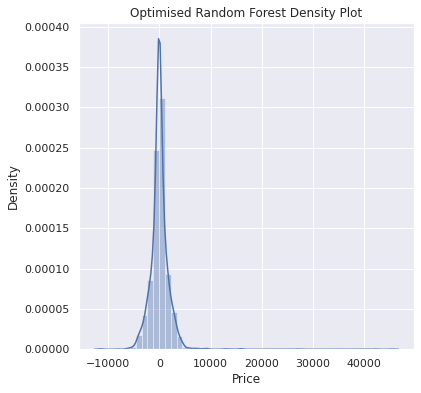

In [ ]:
plt.figure(figsize = (6,6))
sns.distplot(y_test-prediction_forest_op)
plt.title('Optimised Random Forest Density Plot')
plt.show()

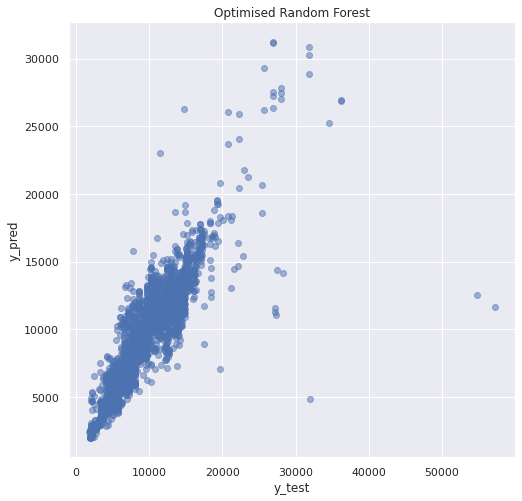

In [ ]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction_forest_op, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.title("Optimised Random Forest")
plt.show()

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

param_grid_lgm = {
   'n_estimators': [100,500,1000,1500] , 
    'learning_rate': [0.001,0.01,0.1,0.5,1],
    'colsample_bytree': [0.6,0.8,1],
    "max_depth": [5,10,50,100,500]
}

Random_search = RandomizedSearchCV(estimator = LGBMRegressor(), param_distributions = param_grid_lgm,scoring='r2', n_iter = 20, cv = 5,verbose=2)

Random_search.fit(X_train,y_train)

Random_search.best_params_

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END colsample_bytree=0.6, learning_rate=0.5, max_depth=100, n_estimators=1500; total time=   2.2s
[CV] END colsample_bytree=0.6, learning_rate=0.5, max_depth=100, n_estimators=1500; total time=   2.3s
[CV] END colsample_bytree=0.6, learning_rate=0.5, max_depth=100, n_estimators=1500; total time=   2.2s
[CV] END colsample_bytree=0.6, learning_rate=0.5, max_depth=100, n_estimators=1500; total time=   1.8s
[CV] END colsample_bytree=0.6, learning_rate=0.5, max_depth=100, n_estimators=1500; total time=   1.4s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=500, n_estimators=1500; total time=   1.5s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=500, n_estimators=1500; total time=   1.4s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=500, n_estimators=1500; total time=   1.5s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=500, n_estimators=1500; total time=   1.4s
[CV] END co

{'colsample_bytree': 0.8,
 'learning_rate': 0.1,
 'max_depth': 100,
 'n_estimators': 500}

In [ ]:
from lightgbm import LGBMRegressor

model_lgm_op = LGBMRegressor(colsample_bytree= 1,learning_rate= 0.1,max_depth= 100,n_estimators= 500)

model_lgm_op.fit(X_train,y_train)

prediction_lgm_op = model_lgm_op.predict(X_test)



In [ ]:
print('LGM MAE OP:', metrics.mean_absolute_error(y_test, prediction_lgm_op))
print('LGM MSE OP:', metrics.mean_squared_error(y_test, prediction_lgm_op))
print('LGM RMSE OP:', np.sqrt(metrics.mean_squared_error(y_test, prediction_lgm_op)))

LGM MAE OP: 1188.3153093733304
LGM MSE OP: 4109919.2661603033
LGM RMSE OP: 2027.2935816403858


In [ ]:
metrics.r2_score(y_test, prediction_lgm_op )

0.8029699014625903

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


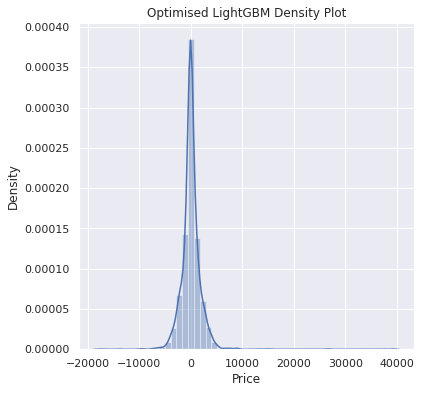

In [ ]:
plt.figure(figsize = (6,6))
sns.distplot(y_test-prediction_lgm_op)
plt.title('Optimised LightGBM Density Plot')
plt.show()

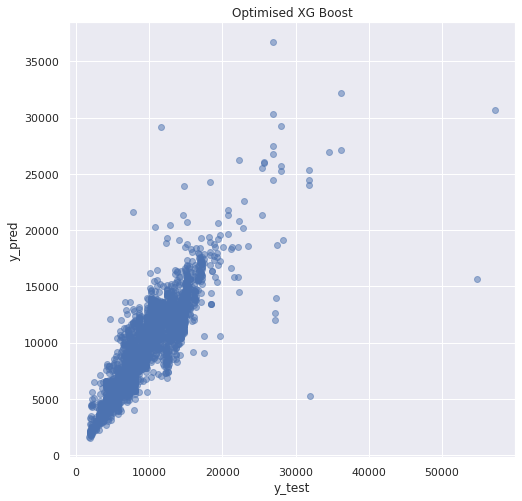

In [ ]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction_lgm_op, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.title("Optimised XG Boost")
plt.show()